# k近邻法（K-nearest neighbors）

可用于分类和回归任务

## 下面的示例：使用KNN完成鸢尾花分类任务

In [8]:
from matplotlib import pyplot as plt
from matplotlib.colors import ListedColormap

from sklearn import datasets
from sklearn.model_selection import train_test_split
import numpy as np
from sklearn.neighbors import KNeighborsClassifier


iris = datasets.load_iris()
print(iris['data'].shape, iris['target'].shape) # (150, 4) (150,)
X = iris.data[:,[2,3]]
y = iris.target
print('Class labels:', np.unique(y))
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1, stratify=y)
print(X_train.shape, y_train.shape)

(150, 4) (150,)
Class labels: [0 1 2]
(105, 2) (105,)


In [2]:
# 训练，并绘制分类决策边界：
def plot_decision_regions(X, y, classifier, test_idx=None, resolution=0.02):
     # setup marker generator and color map
     markers = ('s', 'x', 'o', '^', 'v')
     colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
     cmap = ListedColormap(colors[:len(np.unique(y))])

     # plot the decision surface
     x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
     x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
     xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
                            np.arange(x2_min, x2_max, resolution))
     Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
     Z = Z.reshape(xx1.shape)
     plt.contourf(xx1, xx2, Z, alpha=0.3, cmap=cmap)
     plt.xlim(xx1.min(), xx1.max())
     plt.ylim(xx2.min(), xx2.max())

     for idx, cl in enumerate(np.unique(y)):
         plt.scatter(x=X[y == cl, 0], y=X[y == cl, 1],
         alpha=0.8, c=colors[idx],
         marker=markers[idx], label=cl,
         edgecolor='black')

     # highlight test samples
     if test_idx:
         # plot all samples
         X_test, y_test = X[test_idx, :], y[test_idx]
         plt.scatter(X_test[:, 0], X_test[:, 1],
                     c='', edgecolor='black', alpha=1.0,
                     linewidth=1, marker='o',
                     s=100, label='test set')

In [13]:
# 标准化数据
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
sc.fit(X_train)
X_train_std = sc.transform(X_train)
X_test_std = sc.transform(X_test)

X_combined_std = np.vstack((X_train_std, X_test_std))
y_combined = np.hstack((y_train, y_test))

# 训练，k=5, 距离度量为
knn = KNeighborsClassifier(n_neighbors=5, p=2, metric='minkowski')
knn.fit(X_train_std, y_train)

print('Training accuracy:', knn.score(X_train_std, y_train))
print('Testing accuracy:', knn.score(X_test_std, y_test))

Training accuracy: 0.9619047619047619
Testing accuracy: 1.0


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:32: MatplotlibDeprecationWarning: Using a string of single character colors as a color sequence is deprecated since 3.2 and will be removed two minor releases later. Use an explicit list instead.


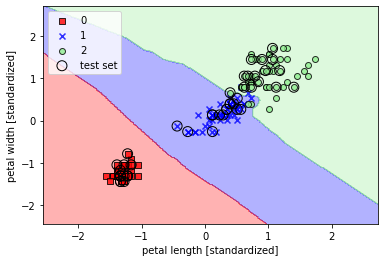

In [14]:
# 绘制决策边界
plot_decision_regions(X_combined_std, y_combined, classifier=knn, test_idx=range(105,150))
plt.xlabel('petal length [standardized]')
plt.ylabel('petal width [standardized]')
plt.legend(loc='upper left')
plt.show()